https://github.com/unit8co

https://blog.ikedaosushi.com/entry/2020/08/25/003557

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from darts import TimeSeries
from darts.models import ExponentialSmoothing

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_html('https://www.nikkei.com/nkd/company/history/dprice/?scode=7261&ba=1')[0]
df_ori = df.copy()

In [3]:
df.head()

,日付,始値,高値,安値,終値,売買高,修正後終値
0,8/28（金）,672,693,664,670,11915900,670.0
1,8/27（木）,665,667,650,657,6060900,657.0
2,8/26（水）,668,682,666,679,5519000,679.0
3,8/25（火）,667,678,664,672,6304200,672.0
4,8/24（月）,662,664,645,647,3979100,647.0


In [4]:
df["date"]= df["日付"].str.split('（', expand=True)[0].values + "/2020"
df['value'] = (df['高値'] + df['安値'])/2

In [5]:
df.head()

,日付,始値,高値,安値,終値,売買高,修正後終値,date,value
0,8/28（金）,672,693,664,670,11915900,670.0,8/28/2020,678.5
1,8/27（木）,665,667,650,657,6060900,657.0,8/27/2020,658.5
2,8/26（水）,668,682,666,679,5519000,679.0,8/26/2020,674.0
3,8/25（火）,667,678,664,672,6304200,672.0,8/25/2020,671.0
4,8/24（月）,662,664,645,647,3979100,647.0,8/24/2020,654.5


In [6]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

In [7]:
ts = pd.Series(df['value'].values, index=df['date'])

In [8]:
ts

date
2020-07-22    705.5
2020-07-27    689.0
2020-07-28    688.5
2020-07-29    657.5
2020-07-30    641.0
2020-07-31    603.0
2020-08-03    584.0
2020-08-04    617.5
2020-08-05    620.0
2020-08-06    609.0
2020-08-07    609.0
2020-08-11    645.5
2020-08-12    661.5
2020-08-13    674.0
2020-08-14    658.0
2020-08-17    661.5
2020-08-18    649.5
2020-08-19    643.0
2020-08-20    657.0
2020-08-21    666.5
2020-08-24    654.5
2020-08-25    671.0
2020-08-26    674.0
2020-08-27    658.5
2020-08-28    678.5
dtype: float64

In [9]:
df_ts = pd.DataFrame( {'value' : ts} ).asfreq('d', method='ffill') #  サンプリングを等しくしないといけない

In [10]:
df_ts['date'] = df_ts.index

In [11]:
df_ts

,value,date
date,,
2020-07-22,705.5,2020-07-22
2020-07-23,705.5,2020-07-23
2020-07-24,705.5,2020-07-24
2020-07-25,705.5,2020-07-25
2020-07-26,705.5,2020-07-26
2020-07-27,689.0,2020-07-27
2020-07-28,688.5,2020-07-28
2020-07-29,657.5,2020-07-29
2020-07-30,641.0,2020-07-30


In [12]:
series = TimeSeries.from_dataframe(df_ts, time_col='date', value_cols='value')

In [13]:
train, val = series.split_after(pd.Timestamp('20200825'))

In [14]:
# モデル生成
model = ExponentialSmoothing()

# 学習
model.fit(train) 

# 予測 (predictには予測数を入れることに注意)
prediction = model.predict(len(val))

/usr/local/lib/python3.7/site-packages/darts/models/exponential_smoothing.py:66: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  seasonal_periods=self.seasonal_periods)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


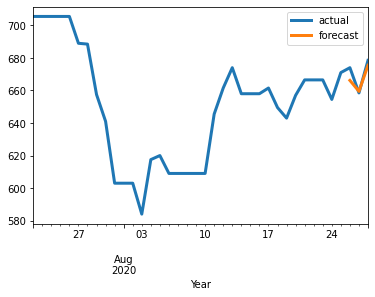

In [15]:
series.plot(label='actual', lw=3)
prediction.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year');

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/site-packages/darts/models/exponential_smoothing.py:66: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  seasonal_periods=self.seasonal_periods)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
i

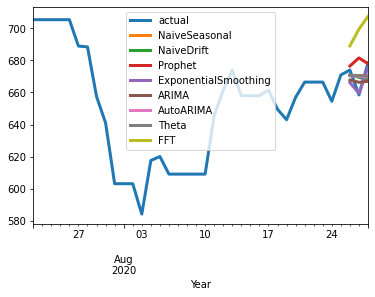

In [16]:
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    StandardRegressionModel,
    Theta,
    FFT
)


series.plot(label='actual', lw=3)

for model in (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    # StandardRegressionModel, -> 初期化時にtrain_n_points が必要
    Theta,
    FFT
):
    m = model()
    m.fit(train)
    pred = m.predict(len(val))
    pred.plot(label=str(model).split(".")[-1][0:-2], lw=3)
    
plt.legend()
plt.xlabel('Year');

奮闘の記録

In [17]:
df = df_ori

In [18]:
df["date"]= df["日付"].str.split('（', expand=True)[0].values + "/2020"

In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
df = df.append(df).sort_values('date').reset_index()

In [21]:
df.head()

,index,日付,始値,高値,安値,終値,売買高,修正後終値,date
0,24,7/22（水）,705,713,698,698,3802100,698.0,2020-07-22
1,24,7/22（水）,705,713,698,698,3802100,698.0,2020-07-22
2,23,7/27（月）,682,700,678,699,4756600,699.0,2020-07-27
3,23,7/27（月）,682,700,678,699,4756600,699.0,2020-07-27
4,22,7/28（火）,700,700,677,681,4549900,681.0,2020-07-28


In [22]:
df.loc[0::2, 'date'] = df.loc[0::2, 'date'] + datetime.timedelta(hours=9)
df.loc[0::2, 'value'] = df.loc[0::2, '始値']
df.loc[1::2, 'date'] = df.loc[1::2, 'date'] + datetime.timedelta(hours=17)
df.loc[1::2, 'value'] = df.loc[1::2, '終値']

In [23]:
df.head()

,index,日付,始値,高値,安値,終値,売買高,修正後終値,date,value
0,24,7/22（水）,705,713,698,698,3802100,698.0,2020-07-22 09:00:00,705.0
1,24,7/22（水）,705,713,698,698,3802100,698.0,2020-07-22 17:00:00,698.0
2,23,7/27（月）,682,700,678,699,4756600,699.0,2020-07-27 09:00:00,682.0
3,23,7/27（月）,682,700,678,699,4756600,699.0,2020-07-27 17:00:00,699.0
4,22,7/28（火）,700,700,677,681,4549900,681.0,2020-07-28 09:00:00,700.0


In [24]:
df['timestamp'] = df['date'].astype(np.int64)//10**9

In [25]:
df.head()

,index,日付,始値,高値,安値,終値,売買高,修正後終値,date,value,timestamp
0,24,7/22（水）,705,713,698,698,3802100,698.0,2020-07-22 09:00:00,705.0,1595408400
1,24,7/22（水）,705,713,698,698,3802100,698.0,2020-07-22 17:00:00,698.0,1595437200
2,23,7/27（月）,682,700,678,699,4756600,699.0,2020-07-27 09:00:00,682.0,1595840400
3,23,7/27（月）,682,700,678,699,4756600,699.0,2020-07-27 17:00:00,699.0,1595869200
4,22,7/28（火）,700,700,677,681,4549900,681.0,2020-07-28 09:00:00,700.0,1595926800


In [26]:
series = TimeSeries.from_dataframe(df, time_col='timestamp', value_cols='value')

[2020-08-29 09:31:50,442] ERROR | darts.timeseries | ValueError: Could not infer explicit frequency. Observed frequencies: none. Is Series too short (n=2)?
ERROR:darts.timeseries:ValueError: Could not infer explicit frequency. Observed frequencies: none. Is Series too short (n=2)?


ValueError: Could not infer explicit frequency. Observed frequencies: none. Is Series too short (n=2)?

In [27]:
temp = df_ori.copy()
temp['date'] = pd.to_datetime(temp['date'])
_temp = df_ori.copy()
_temp['date'] = pd.to_datetime(temp['date']) + datetime.timedelta(days=38)
temp = temp.append(_temp)

In [28]:
temp = temp.sort_values('date')

In [29]:
temp

,日付,始値,高値,安値,終値,売買高,修正後終値,date
24,7/22（水）,705,713,698,698,3802100,698.0,2020-07-22
23,7/27（月）,682,700,678,699,4756600,699.0,2020-07-27
22,7/28（火）,700,700,677,681,4549900,681.0,2020-07-28
21,7/29（水）,670,674,641,643,7615700,643.0,2020-07-29
20,7/30（木）,646,653,629,636,6367400,636.0,2020-07-30
19,7/31（金）,616,618,588,591,11316900,591.0,2020-07-31
18,8/3（月）,596,603,565,576,12102200,576.0,2020-08-03
17,8/4（火）,602,637,598,637,9703300,637.0,2020-08-04
16,8/5（水）,613,631,609,622,8601500,622.0,2020-08-05
15,8/6（木）,612,620,598,603,8330600,603.0,2020-08-06


In [30]:
temp['value'] = (temp['高値'] + temp['安値'])/2

In [31]:
series = TimeSeries.from_dataframe(temp.head(), 'date', ['value'])

In [32]:
series = TimeSeries.from_dataframe(temp, 'date', ['value'])

[2020-08-29 09:32:01,883] ERROR | darts.timeseries | ValueError: Could not infer explicit frequency. Observed frequencies: {'B', 'D'}. Is Series too short (n=2)?
ERROR:darts.timeseries:ValueError: Could not infer explicit frequency. Observed frequencies: {'B', 'D'}. Is Series too short (n=2)?


ValueError: Could not infer explicit frequency. Observed frequencies: {'B', 'D'}. Is Series too short (n=2)?

example

In [33]:
df = pd.read_csv('AirPassengers.csv', delimiter=",")
series = TimeSeries.from_dataframe(df, 'Month', ['#Passengers'])

In [34]:
df['Month'] =  pd.to_datetime(df['Month'])

In [35]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [36]:
series

              0
Month          
1949-01-01  112
1949-02-01  118
1949-03-01  132
1949-04-01  129
1949-05-01  121
...         ...
1960-08-01  606
1960-09-01  508
1960-10-01  461
1960-11-01  390
1960-12-01  432

[144 rows x 1 columns]
Freq: MS

In [37]:
# 1959/01/01以前と以後に分割
train, val = series.split_after(pd.Timestamp('19590101'))

from darts.models import ExponentialSmoothing

# モデル生成
model = ExponentialSmoothing()

# 学習
model.fit(train) 

# 予測 (predictには予測数を入れることに注意)
prediction = model.predict(len(val))

/usr/local/lib/python3.7/site-packages/darts/models/exponential_smoothing.py:66: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  seasonal_periods=self.seasonal_periods)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


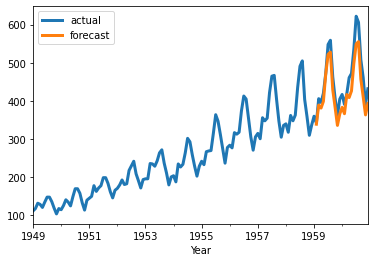

In [38]:
series.plot(label='actual', lw=3)
prediction.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year');

In [39]:
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    StandardRegressionModel,
    Theta,
    FFT
)

for model in (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    # StandardRegressionModel, -> 初期化時にtrain_n_points が必要
    Theta,
    FFT
):
    m = model()
    m.fit(train)
    pred = m.predict(len(val))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/site-packages/darts/models/exponential_smoothing.py:66: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  seasonal_periods=self.seasonal_periods)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
i